# Lineare Regression mit Fehlerbalken

**Gegeben** sei eine Messreihe von 10 Messwerten $y_i$ mit annäherend konstanten Verhalten, d.h. es wurde 10 mal ein Wert um 10 herum gemessen. 
Diese Messwerte sind im folgenden Diagramm inklusive Fehlerbalken (Anzeige der Messunsicherheit) dargestellt. Die Unsicherheit der $x$-Achse wird vernachlässigt.

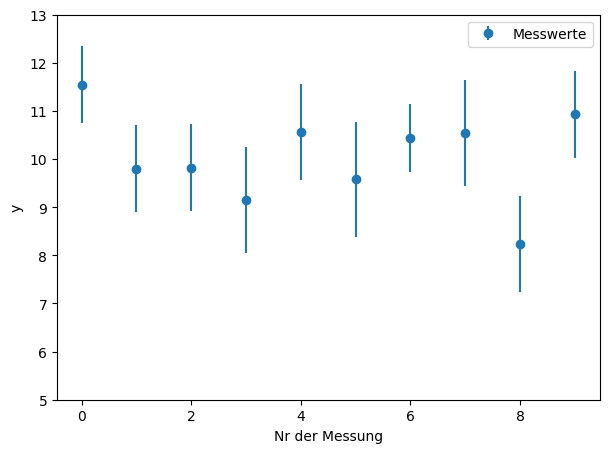

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(7,5)) # Plot-Größe
plt.rcParams['font.size'] = 10; # Schriftgröße

y = [11.55, 9.8, 9.82, 9.15, 10.57, 9.58, 10.44, 10.55, 8.23, 10.93] #Messwerte y_i
s_y = [0.8, 0.9, 0.9, 1.1, 1.0, 1.2, 0.7, 1.1, 1.0, 0.9] #Unsicherheiten Fall 1
x = [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.] #Messwerte y_i

y = np.array(y) #konvertiere die Messwerte in ein Numpy-Array
x = np.array(x) #konvertiere die Messwerte in ein Numpy-Array
s_y = np.array(s_y) #konvertiere die Unsicherheiten in ein Numpy-Array

plt.errorbar(x,y, fmt='o', xerr = None, yerr = s_y, label = 'Messwerte')
plt.xlabel('Nr der Messung')
plt.ylabel('y')
plt.ylim([5,13])
plt.legend()
plt.show()

Wir wollen nun **überprüfen**, ob das Verhalten wirklich *konstant* oder *linear steigend* oder doch eher *linear abfallend* ist. Hierfür werden wir im Folgenden eine lineare Ausgleichsgerade an die Daten anpassen (**Kurvenanpassung**/Lineare Regression). 

## Recap: Lineare Regression

Im [Vorlesungsskript](1_Kurvenanpassung) findet ihr die Vorgehensweise, wie lineare Ausgleichsgeraden berechnet werden:
* Gegeben: $y_i$ Messwerte (hier 10)
* Gesucht: lineare Ausgleichsgerade der Form $f(x) = y = a\cdot x + b$, welche bestmöglich die Messdaten $y_i$ beschreiben soll
* Konsequenz: Modell $f(x_i)$ und Messdaten $y_i$ werden voneinander abweichen. Die Abweichung beträgt $\epsilon_i = \left( f(x_i) - y_i\right)$
* Ziel: Die Abweichung $\epsilon$ so klein wie möglich machen
* Strategie: Methode der kleinsten Quadrate verwenden: 
    * Für alle $N=10$ Messwerte erhalten wir einen Fehler $\epsilon_i$. 
    * Die jeweiligen Fehler summieren wir auf um dem Gesamtfehler der kompletten Messreihe zu erhalten: $\sum_{i = 0}^{9} \epsilon_i$
    * Wir definieren die Gütefunktion, indem wir die Fehler quadrieren, dadurch können sich diese nicht versehentlich aufheben. Außerdem werden stärkere Abweichungen stärker gewichtet: $Q =\sum_{i=0}^9 \left( f(x_i) - y_i\right)^2 :=  \sum_{i=9}^9 \epsilon_i^2 = \mathrm{min!}$

## Der Einfluss von Fehlerbalken auf den Fit <a id="SubSec-Ausprobieren"></a>

Im Allgemeinen gilt, je kleiner die Unsicherheit eines Messwertes ist, desto wichtiger ist dieser Messwert für die Mittelwertbildung. Die analytische Lösung würde wiefolgt aussehen:

  -  $S(c) = \displaystyle\sum_{i=1}^{N} \frac{(y_i -c)^2}{{s_i}^2}$
  -  $0= \frac{dS}{dc} = \displaystyle\sum_{i=1}^{N} \frac{2 (y_i -c)}{{s_i}^2}$
  >  $\Rightarrow {\hat c} = \frac{1}{\sum{1/s_i}^2}
     \displaystyle\sum_{i=1}^{N}\frac{1}{{s_i}^2}y_i $  

Mit der Definition $ w_i \equiv \frac{1} {{s_i}^2}$ erhalten wir als wichtiges
Ergebnis die Formel für den *gewichteten Mittelwert*:
>  ${\hat c}= \frac{1} {\sum {w_i}} \displaystyle\sum_{i=1}^{N}  {w_i} y_i$  

Der Mittelwert ist die mit $1/s_i^2$ gewichtete Summe der Einzelmessungen. 
Die Gewichte entsprechen der obigen Erwartung: Messwerte mit den kleinsten $s_i$
bekommen bei der Mittelwertbildung das größte Gewicht. Am Vorfaktor $1/\sum w_i$ kann
man ablesen, dass die Zahl der Messwerte $N$ in diesem Fall durch die Summe der Gewichte
$\sum w_i$ ersetzt werden muss.

Ist der Fehler für alle Messwerte konstant, so kann $s_i$ einfach auf die andere Seite multipliziert werden und verschwindet aus der Gleichung. Ist der Fehler Null, nutzen wir die Gütefunktion, welche minimiert werden muss: 

  -  $Q(c) := \sum_{i=1}^n (y_i - f(x))^2 = \sum_{i=1}^n (y_i - c)^2 = \textrm{min?}$

In [2]:
def S(y,c): # Minimierungsfunktion mit Fehler
    return ((y-c)**2 / s_y).sum()

def Q(y,c): # Minimierungsfehler ohne Fehler
    return ((y-c)**2).sum()

Die Minimierung kann einfach ausgeführt werden, indem die Gütefunktion für verschiedene Funktionsparameter ($c$) ausprobiert wird, im Folgenden werden für $c$ 100 Werte zwischen 8 und 12 ausprobiert:

Minimum unter Einbezug von Unsicherheiten ist bei c = 10.141414141414142
Minimum ohne  Einbezug von Unsicherheiten ist bei c = 10.06060606060606


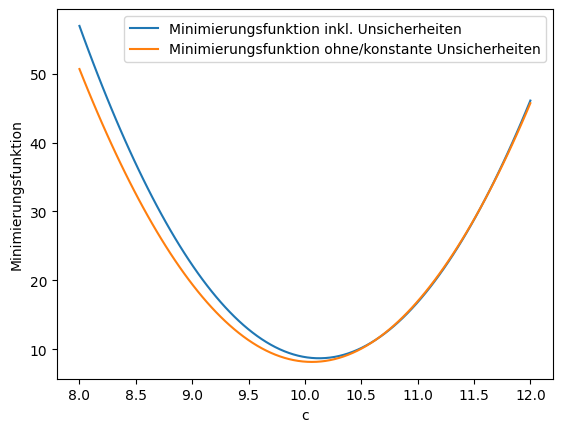

In [3]:
c_val = np.linspace(8,12,100)
S_c = []
Q_c = []

for c in c_val:
    S_c.append(S(y,c))
    Q_c.append(Q(y,c))
    
id_min_S = np.argmin(S_c)
id_min_Q = np.argmin(Q_c)

print("Minimum unter Einbezug von Unsicherheiten ist bei c =", c_val[id_min_S])
print("Minimum ohne  Einbezug von Unsicherheiten ist bei c =", c_val[id_min_Q])

plt.figure()
plt.plot(c_val, S_c, label='Minimierungsfunktion inkl. Unsicherheiten')
plt.plot(c_val, Q_c, label = 'Minimierungsfunktion ohne/konstante Unsicherheiten')
plt.xlabel('c')
plt.ylabel('Minimierungsfunktion')
plt.legend()
plt.show()

Schon bei dieser schnellen Analyse sehen wir, dass es einen Unterschied gibt, ob wir die Fehlerbalken miteinbeziehen, oder ob keine Unsicherheiten vorhanden sind. Sind die absoluten Unsicherheiten für alle Messwerte die gleichen, so trifft der Fall *ohne* Unsicherheiten zu.  

##  Kurvenanpassung mit Python: scipy <a id="SubSec-scipy_bsp2"></a>

Im Folgenden Code-Block wollen wir die Analyse dieser einfachen Messreihe noch einmal mittel scipy-Paket wiederholen und eine lineare Regression und konstante Regression auf die Messdaten anwenden. Wir definieren also zwei Fit-Funktionen:

In [4]:
def fit_lin(x, b, a): # Funktion für lineare Regression
    return b*x + a

def fit_const(x, a): # Funktion für konstante Regression
    return a + x - x

def f(x, c_val): # Funktion um Minimierungsfunktion in Diagramm zu zeichnen
    return c_val + x-x

Diese beiden Funktionen werden nun benutzt, um die Daten zu modellieren. Wir testen jeweils beide Fälle, nämlich mit und ohne Fehlerbalken:

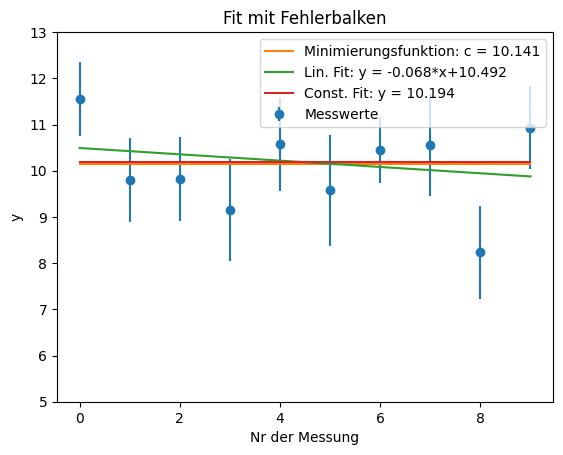

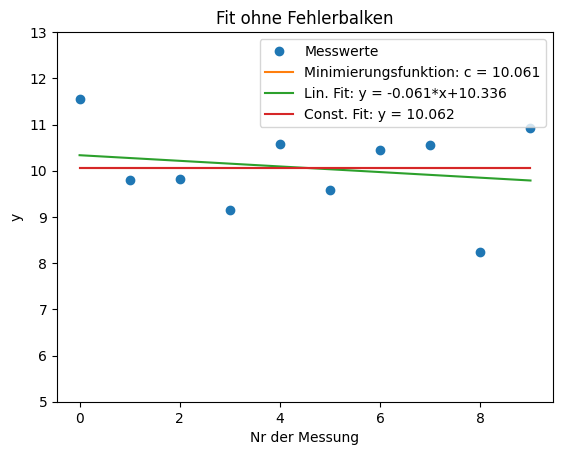

In [5]:
from scipy.optimize import curve_fit
# ----- Mit Fehlerbalken: ---- #

fit_lin_out_err = curve_fit(fit_lin, x, y, sigma=s_y)
fit_const_out_err = curve_fit(fit_const, x, y, sigma=s_y)

plt.errorbar(x,y, fmt='o', xerr = None, yerr = s_y, label = 'Messwerte')
plt.plot(x,f(x,  c_val[id_min_S]), label = 'Minimierungsfunktion: c = %5.3f'%(c_val[id_min_S]))
plt.plot(x,fit_lin(x, fit_lin_out_err[0][0], fit_lin_out_err[0][1]), label = 'Lin. Fit: y = %5.3f*x+%5.3f'%(fit_lin_out_err[0][0], fit_lin_out_err[0][1]))
plt.plot(x,fit_const(x, fit_const_out_err[0][0]), label = 'Const. Fit: y = %5.3f'%(fit_const_out_err[0][0]))
plt.xlabel('Nr der Messung')
plt.ylabel('y')
plt.ylim([5,13])
plt.legend()
plt.title('Fit mit Fehlerbalken')
plt.show()


# ----- Ohne Fehlerbalken: ---- #

fit_lin_out = curve_fit(fit_lin, x, y)
fit_const_out = curve_fit(fit_const, x, y)

plt.plot(x,y, 'o', label = 'Messwerte')
plt.plot(x,f(x,  c_val[id_min_Q]), label = 'Minimierungsfunktion: c = %5.3f'%(c_val[id_min_Q]))
plt.plot(x,fit_lin(x, fit_lin_out[0][0], fit_lin_out[0][1]), label = 'Lin. Fit: y = %5.3f*x+%5.3f'%(fit_lin_out[0][0], fit_lin_out[0][1]))
plt.plot(x,fit_const(x, fit_const_out[0][0]), label = 'Const. Fit: y = %5.3f'%(fit_const_out[0][0]))
plt.xlabel('Nr der Messung')
plt.ylabel('y')
plt.ylim([5,13])
plt.legend()
plt.title('Fit ohne Fehlerbalken')
plt.show()

##  Kurvenanpassung mit Python: lmfit <a id="SubSec-lmfit_bsp2"></a>

Das vorangegangene Beispiel mit scipy zeigt auf, wie aufwändig es ist eine Fitparameter zu fixieren. Es muss eine neue Funktion mit weniger Freiheitsgeraden definiert werden. Wie oben schon angeükndigt, lässt sich dies mit dem lmfit-Paket etwas einfacher lösen und soll hier anhand des Beispiels noch einmal visualisiert werden. 

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
abschnitt     10.49     -inf      inf   0.5446     True     None     None
steigung   -0.06839     -inf      inf   0.1031     True     None     None
[[Model]]
    Model(f_lin)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 10
    # variables        = 2
    chi-square         = 8.81129304
    reduced chi-square = 1.10141163
    Akaike info crit   = 2.73449106
    Bayesian info crit = 3.33966124
[[Variables]]
    steigung:  -0.06839389 +/- 0.10313985 (150.80%) (init = 0)
    abschnitt:  10.4919542 +/- 0.54460553 (5.19%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(steigung, abschnitt) = -0.825


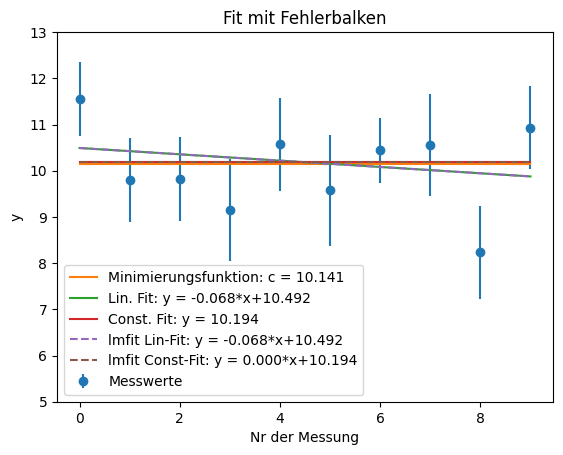

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
abschnitt     10.34     -inf      inf   0.5822     True     None     None
steigung   -0.06085     -inf      inf   0.1091     True     None     None
[[Model]]
    Model(f_lin)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 10
    # variables        = 2
    chi-square         = 7.84870061
    reduced chi-square = 0.98108758
    Akaike info crit   = 1.57762897
    Bayesian info crit = 2.18279916
[[Variables]]
    steigung:  -0.06084848 +/- 0.10905032 (179.22%) (init = 0)
    abschnitt:  10.3358182 +/- 0.58216937 (5.63%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(steigung, abschnitt) = -0.843
Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
abschnitt     10.06     -inf      inf    0.301     True     None     None
steigung          0     -inf      inf        0    False     None     None
[[Model]]
    Mod

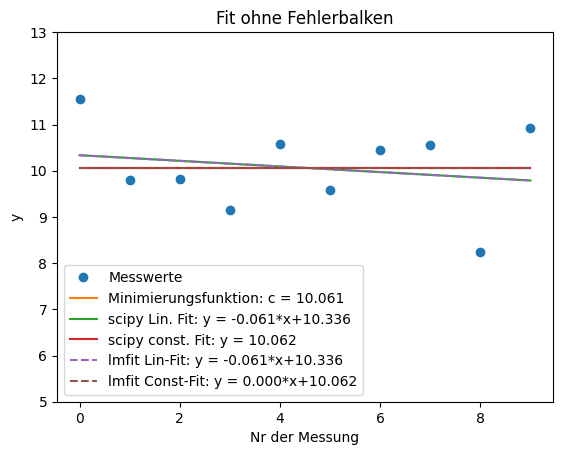

In [6]:
from lmfit import minimize, Parameters
from lmfit import Model

# ----- Mit Fehlerbalken: ---- #

def f_lin(x, steigung, abschnitt):
    return steigung*x + abschnitt

model = Model(f_lin)
params = model.make_params(steigung=0.0, abschnitt=10.0)
result_lin = model.fit(y, params, x=x, weights = 1/s_y) # Fehlerbalken werden über die 'weights = 1/sigma' Option berücksichtigt

params['steigung'].set(0.0, vary=False)
result_const = model.fit(y, params, x=x, weights = 1/s_y)

#print('Fit Parameter der Linearen Regression:')
result_lin.params.pretty_print()
#print('Fit Report:')
print(result_lin.fit_report())

#print('Fit Parameter der Konstanten Regression:')
#result_const.params.pretty_print()
#print('Fit Report:')
#print(result_const.fit_report())

plt.errorbar(x,y, fmt='o', xerr = None, yerr = s_y, label = 'Messwerte')
plt.plot(x,f(x,  c_val[id_min_S]), label = 'Minimierungsfunktion: c = %5.3f'%(c_val[id_min_S]))
plt.plot(x,fit_lin(x, fit_lin_out_err[0][0], fit_lin_out_err[0][1]), label = 'Lin. Fit: y = %5.3f*x+%5.3f'%(fit_lin_out_err[0][0], fit_lin_out_err[0][1]))
plt.plot(x,fit_const(x, fit_const_out_err[0][0]), label = 'Const. Fit: y = %5.3f'%(fit_const_out_err[0][0]))
plt.plot(x,result_lin.best_fit, '--',label = 'lmfit Lin-Fit: y = %5.3f*x+%5.3f' %(result_lin.params['steigung'].value,result_lin.params['abschnitt'].value))  # plot Fitfunktion mit b und a
plt.plot(x,result_const.best_fit, '--',label = 'lmfit Const-Fit: y = %5.3f*x+%5.3f' %(result_const.params['steigung'].value,result_const.params['abschnitt'].value))  # plot Fitfunktion mit b und a
plt.xlabel('Nr der Messung')
plt.ylabel('y')
plt.ylim([5,13])
plt.legend()
plt.title('Fit mit Fehlerbalken')
plt.show()


# ----- Ohne Fehlerbalken: ---- #

def f_lin(x, steigung, abschnitt):
    return steigung*x + abschnitt

model = Model(f_lin)
params = model.make_params(steigung=0.0, abschnitt=10.0)
result_lin = model.fit(y, params, x=x)

params['steigung'].set(0.0, vary=False)
result_const = model.fit(y, params, x=x)

#print('Fit Parameter der Linearen Regression:')
result_lin.params.pretty_print()
#print('Fit Report:')
print(result_lin.fit_report())

#print('Fit Parameter der Konstanten Regression:')
result_const.params.pretty_print()
#print('Fit Report:')
print(result_const.fit_report())

plt.plot(x,y, 'o', label = 'Messwerte')
plt.plot(x,f(x,  c_val[id_min_Q]), label = 'Minimierungsfunktion: c = %5.3f'%(c_val[id_min_Q]))
plt.plot(x,fit_lin(x, fit_lin_out[0][0], fit_lin_out[0][1]), label = 'scipy Lin. Fit: y = %5.3f*x+%5.3f'%(fit_lin_out[0][0], fit_lin_out[0][1]))
plt.plot(x,fit_const(x, fit_const_out[0][0]), label = 'scipy const. Fit: y = %5.3f'%(fit_const_out[0][0]))
plt.plot(x,result_lin.best_fit, '--',label = 'lmfit Lin-Fit: y = %5.3f*x+%5.3f' %(result_lin.params['steigung'].value,result_lin.params['abschnitt'].value))  # plot Fitfunktion mit b und a
plt.plot(x,result_const.best_fit, '--',label = 'lmfit Const-Fit: y = %5.3f*x+%5.3f' %(result_const.params['steigung'].value,result_const.params['abschnitt'].value))  # plot Fitfunktion mit b und a
plt.xlabel('Nr der Messung')
plt.ylabel('y')
plt.ylim([5,13])
plt.legend()
plt.title('Fit ohne Fehlerbalken')
plt.show()